# Exercises: Image Analysis

There's only one problem today: build and tweak a classification model until it works quite well.

1. Choose a dataset on Kaggle. Check the [computer vision tag](https://www.kaggle.com/datasets?tags=13207-Computer+Vision). I recommend looking for fairly small datasets (under a few hundred MB). Here's one that we can try together: [Satellite Image Classification](https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification) or [Is it on fire?](https://www.kaggle.com/datasets/phylake1337/fire-dataset)
2. Load the data in. Setting up a DataBlock to load in the data is hard the first time, as the folder structure may not be the same as we used before. This page in the [fastai documentation](https://docs.fast.ai/data.transforms.html) includes various kinds of splitters and labelers, but you may have to write your own.
3. Try the different optimizations we've used in class. Figure out which ones are actually worthwhile. Mess around with the batch size to efficiently use the GPU memory.
4. Train your data for a bunch (20 or so, depending on size) epochs and see if you get a good result.
5. Check out the confusion matrix and use `learn.recorder.plot_loss()` to make a plot of the loss. Comment.
6. Check out what other Kaggle users have achieved in their notebooks. How do your results compare?

In [ ]:
from fastai.vision.all import *

In [ ]:
%env KAGGLE_USERNAME="donnydutch"
%env KAGGLE_KEY="e000856dbf910d714ae70609d63d00aa"

!kaggle datasets download -d phylake1337/fire-dataset
!unzip fire-dataset.zip


env: KAGGLE_USERNAME="donnydutch"
env: KAGGLE_KEY="e000856dbf910d714ae70609d63d00aa"
Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
fire-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fire-dataset.zip
replace fire_dataset/fire_images/fire.1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_im

In [ ]:
path = Path("/content/fire_dataset")


In [ ]:

smol1 = Path("smol")

resize_images(path/'fire_images', dest=smol1/'fire_images', max_size=128, recurse=True)
resize_images(path/'non_fire_images', dest=smol1/'non_fire_images', max_size=128, recurse=True)

In [ ]:
fire = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed = 42),
                 get_y = parent_label,
                 item_tfms=Resize(150),
                 batch_tfms=aug_transforms(size=160, min_scale=0.75, max_rotate=90, flip_vert=True))

dls = fire.dataloaders(smol1, bs=256)

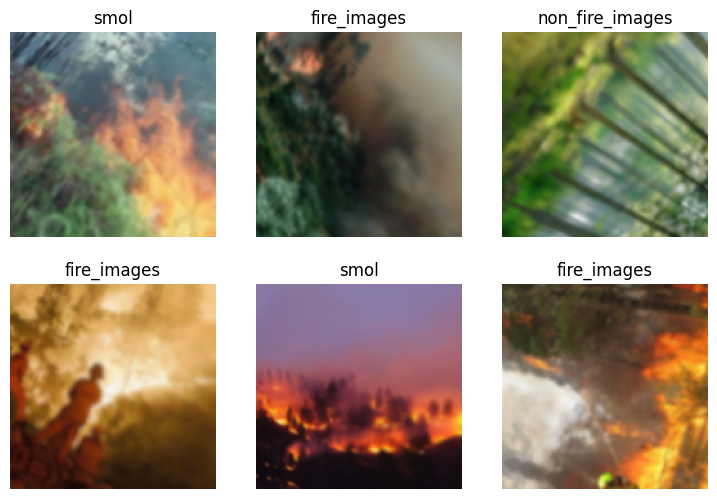

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)
learn.fine_tune(2) #learn.fine_tune(2 , base_lr= )

epoch,train_loss,valid_loss,error_rate,time
0,1.901217,2.249180,0.563910,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.723268,1.294500,0.573935,00:06
1,1.674513,1.219839,0.563910,00:08


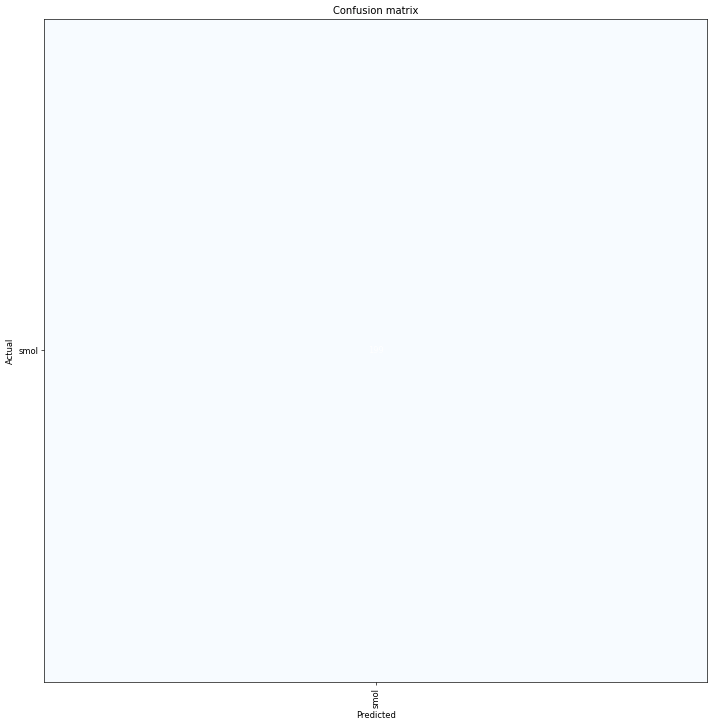

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)
learn.lr_find()